In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
path = "input/delhi-climate/DailyDelhiClimateTrain.csv"
df = pd.read_csv(path)
df.head() 

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [57]:
x = df.set_index(pd.to_datetime(df["date"]))["meantemp"].to_frame()
x_bounded = x.loc[x.index < "2013-04-01"]

x_bounded.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


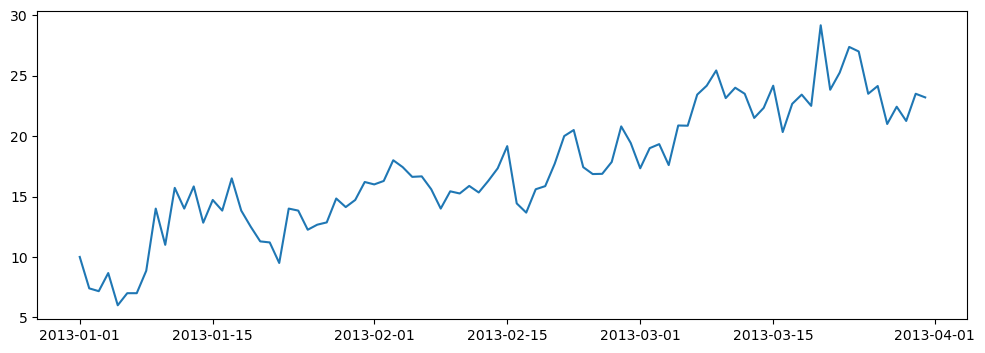

In [58]:
ax = plt.figure(figsize=(12, 4))
plt.plot(x_bounded.index, x_bounded["meantemp"])
plt.show()

# With seasonal decompose

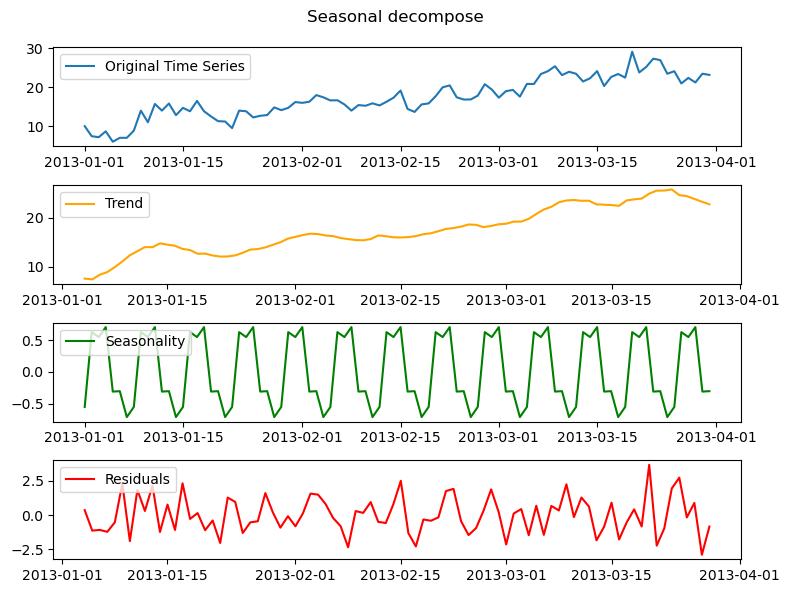

In [59]:
# perform decomposition
decomposition = seasonal_decompose(x_bounded, model="additive")

# extract component
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# plot the components
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.plot(x_bounded, label="Original Time Series")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(trend, label="Trend", color="orange")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(seasonality, label="Seasonality", color="green")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(residual, label="Residuals", color="red")
plt.legend(loc="upper left")

plt.suptitle("Seasonal decompose")
plt.tight_layout()
plt.show()

# With STL

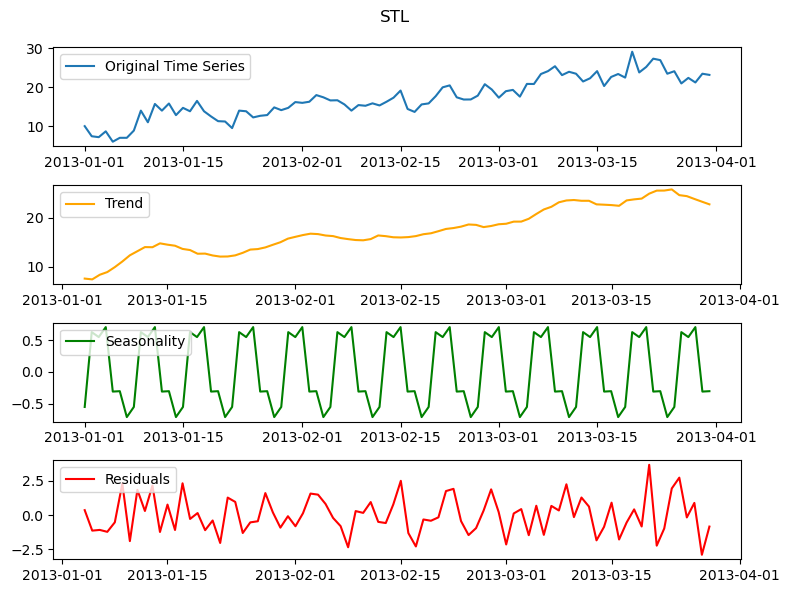

In [60]:
from statsmodels.tsa.seasonal import STL

# perform decomposition
stl = STL(x_bounded, seasonal=13)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# extract component
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# plot the components
plt.figure(figsize=(8, 6))

plt.subplot(411)
plt.plot(x_bounded, label="Original Time Series")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(trend, label="Trend", color="orange")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(seasonality, label="Seasonality", color="green")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(residual, label="Residuals", color="red")
plt.legend(loc="upper left")

plt.suptitle("STL")
plt.tight_layout()
plt.show()

# With hpfilter

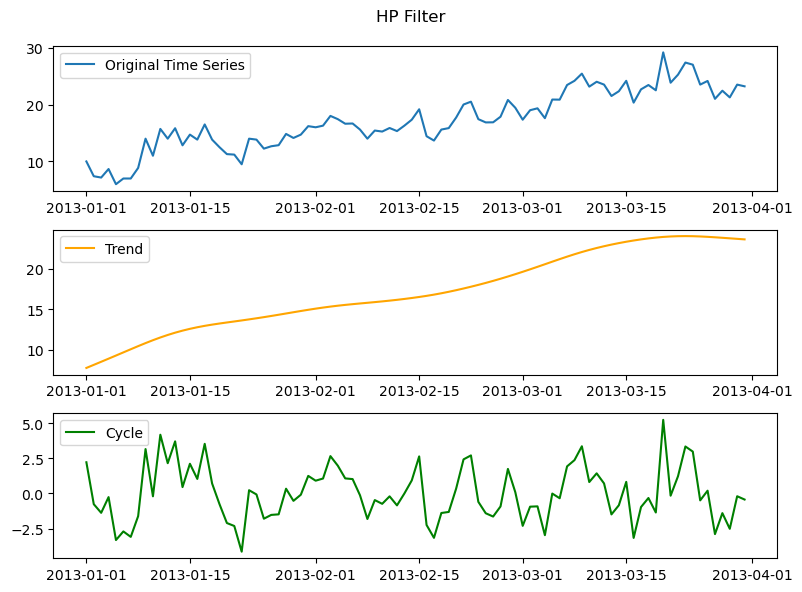

In [68]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(x_bounded, lamb=1600)  # Lambda parameter controls smoothness

# plot the components
plt.figure(figsize=(8, 6))

plt.subplot(311)
plt.plot(x_bounded, label="Original Time Series")
plt.legend(loc="upper left")

plt.subplot(312)
plt.plot(trend, label="Trend", color="orange")
plt.legend(loc="upper left")

plt.subplot(313)
plt.plot(cycle, label="Cycle", color="green")
plt.legend(loc="upper left")

plt.suptitle("HP Filter")
plt.tight_layout()
plt.show()


# With Bandpass Filter

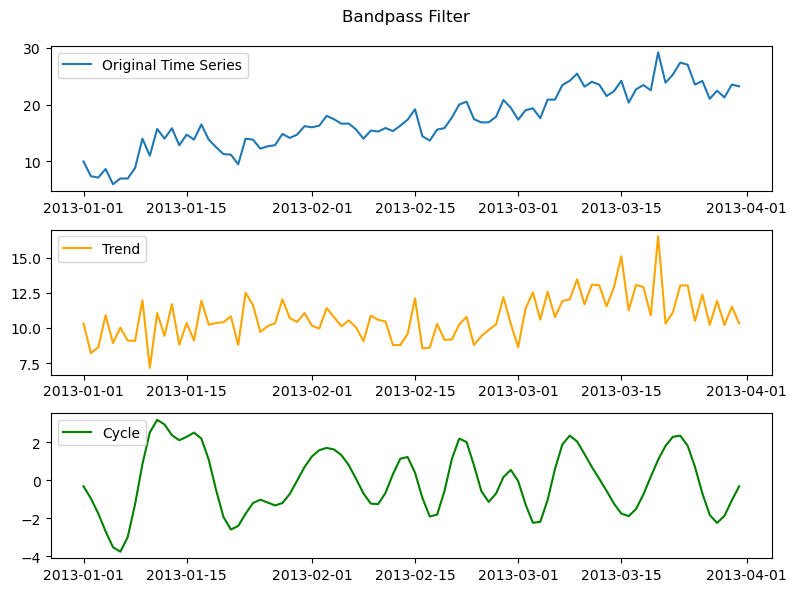

In [73]:
from statsmodels.tsa.filters.cf_filter import cffilter

cycle, trend = cffilter(x_bounded)

# plot the components
plt.figure(figsize=(8, 6))

plt.subplot(311)
plt.plot(x_bounded, label="Original Time Series")
plt.legend(loc="upper left")

plt.subplot(312)
plt.plot(trend, label="Trend", color="orange")
plt.legend(loc="upper left")

plt.subplot(313)
plt.plot(cycle, label="Cycle", color="green")
plt.legend(loc="upper left")

plt.suptitle("Bandpass Filter")
plt.tight_layout()
plt.show()